In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from dowhy import gcm
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp

In [2]:
# Create node lookup for channels
node_lookup = {0: 'target',
               1: 'direct 1',
               2: 'direct 2', 
               3: 'indirect 1',
               4: 'indirect 2',
               5: 'lagged 1',
               6: 'lagged 2',               
               7: 'spurious 1',
               8: 'spurious 2',
 }

total_nodes = len(node_lookup)

# Create adjacency matrix - this is the base for our graph
graph_actual = np.zeros((total_nodes, total_nodes))

# Create graph using expert domain knowledge
graph_actual[1, 0] = 1.0 # direct 1
graph_actual[2, 0] = 1.0 # direct 2
graph_actual[3, 1] = 1.0 # indirect 1
graph_actual[4, 2] = 1.0 # indirect 2
graph_actual[5, 0] = 1.0 # lagged 1
graph_actual[6, 0] = 1.0 # lagged 2
graph_actual[3, 7] = 1.0 # spurious 1
graph_actual[4, 8] = 1.0 # spurious 2
     
graph_actual

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

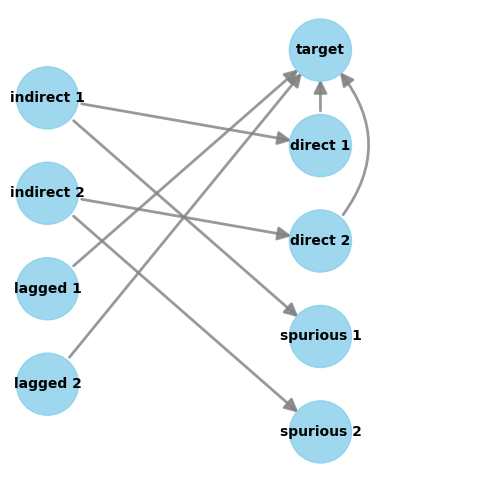

In [3]:
# Setup graph
graph = nx.from_numpy_array(graph_actual, create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, node_lookup)
gcm.util.plot(graph, figure_size=(6,6))

\begin{align*}
X^8_t &= 0.1 X^8_{t-1} + 0.8 X^4_t + \eta^8_t\\
X^7_t &= 0.2 X^7_{t-1} + 0.9 X^3_t + \eta^7_t\\
X^6_t &= 0.4 X^6_{t-1} + \eta^6_t\\
X^5_t &= 0.5 X^5_{t-2} + \eta^5_t\\
X^4_t &= 0.6 X^4_{t-1} + \eta^4_t\\
X^3_t &= 0.7 X^3_{t-1} + \eta^3_t\\
X^2_t &= 0.3 X^2_{t-1} + 0.4 X^4_t + \eta^2_t\\
X^1_t &= 0.5 X^1_{t-1} + 0.6 X^3_t + \eta^1_t\\
X^0_t &= 0.2 X^0_{t-1} + 0.9 X^1_t + 0.5 X^2_t + 0.4 X^5_t + 0.7 X^6_t + \eta^0_t\\
\end{align*}

In [4]:
seed=42
np.random.seed(seed)

def lin_f(x): 
    return x

links_coeffs = {0: [((0, -1), 0.7, lin_f), ((1, -1), -0.8, lin_f)],
                1: [((1, -1), 0.8, lin_f), ((3, -1), 0.8, lin_f)],
                2: [((2, -1), 0.5, lin_f), ((1, -2), 0.5, lin_f), ((3, -3), 0.6, lin_f)],
                3: [((3, -1), 0.4, lin_f)],
                3: [((3, -1), 0.4, lin_f)],                
                3: [((3, -1), 0.4, lin_f)],                
                3: [((3, -1), 0.4, lin_f)],                
                
                
}

T = 1000 # time series length

data, _ = toys.structural_causal_process(links_coeffs, T=T, seed=seed)

T, N = data.shape

# Initialize dataframe object, specify time axis and variable names
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)

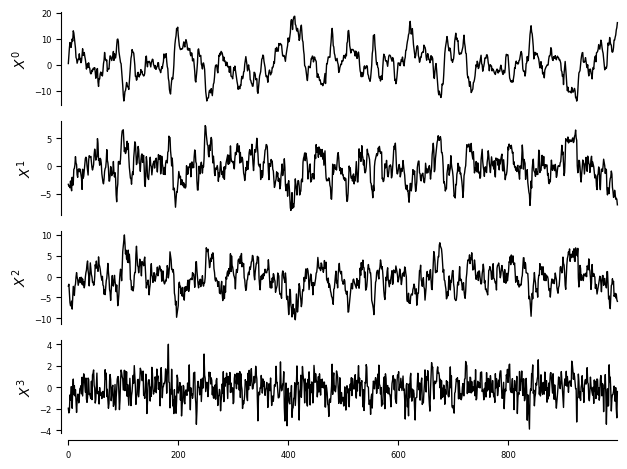

In [5]:
tp.plot_timeseries(dataframe)
plt.show()